<a href="https://colab.research.google.com/github/pranay0745/Machine_Learning/blob/master/Diabets_database.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import  numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,classification_report,confusion_matrix
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import export_graphviz

In [0]:
import glob 
glob.glob('*csv')

['diabetes.csv', 'insurance.csv', 'train.csv']

In [0]:
db = pd.read_csv('diabetes.csv')

In [0]:
db

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [0]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [0]:
db.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [0]:
db.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


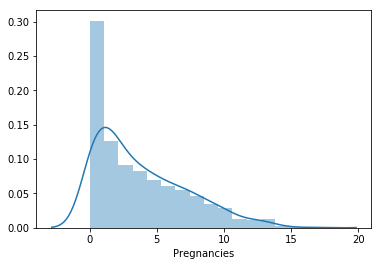

In [0]:
sns.distplot(db['Pregnancies']);

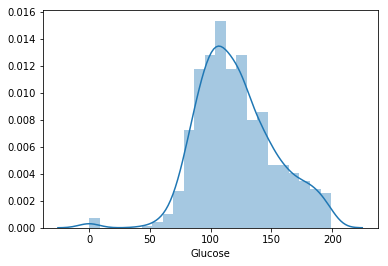

In [0]:
sns.distplot(db['Glucose']);

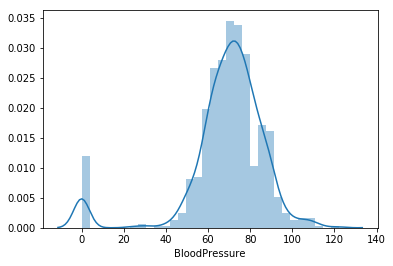

In [0]:
sns.distplot(db['BloodPressure']);

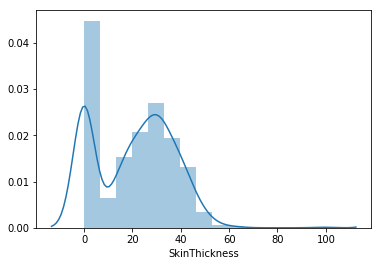

In [0]:
sns.distplot(db['SkinThickness']);

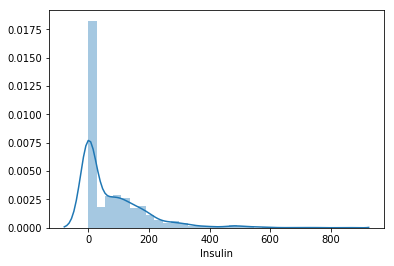

In [0]:
sns.distplot(db['Insulin']);

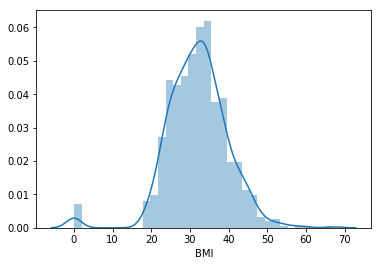

In [0]:
sns.distplot(db['BMI']);

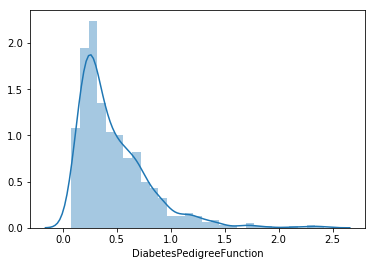

In [0]:
sns.distplot(db['DiabetesPedigreeFunction']);

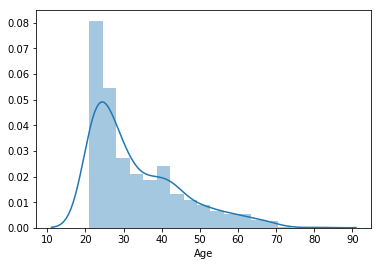

In [0]:
sns.distplot(db['Age']);

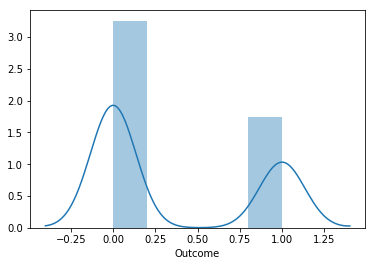

In [0]:
sns.distplot(db['Outcome']);

In [0]:
X=db.values[:,0:8]
Y=db.values[:,8:]

In [0]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [0]:
Y

array([[1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],

In [0]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,shuffle=True,random_state=42)

In [0]:
X_train

array([[  1.   ,  95.   ,  60.   , ...,  23.9  ,   0.26 ,  22.   ],
       [  5.   , 105.   ,  72.   , ...,  36.9  ,   0.159,  28.   ],
       [  0.   , 135.   ,  68.   , ...,  42.3  ,   0.365,  24.   ],
       ...,
       [ 10.   , 101.   ,  86.   , ...,  45.6  ,   1.136,  38.   ],
       [  0.   , 141.   ,   0.   , ...,  42.4  ,   0.205,  29.   ],
       [  0.   , 125.   ,  96.   , ...,  22.5  ,   0.262,  21.   ]])

In [0]:
X_train.shape

(537, 8)

In [0]:
Y_train.shape

(537, 1)

In [0]:
X_test.shape

(231, 8)

In [0]:
Y_test.shape

(231, 1)

In [0]:
clf_entropy = DecisionTreeClassifier(criterion='entropy')

In [0]:
clf_entropy

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [0]:
clf_entropy.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [0]:
Y_pred_entropy = clf_entropy.predict(X_test)
Y_pred_entropy

array([1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1.,
       0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
       1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0.,
       1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0.,
       0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1.,
       0., 0., 0., 0., 1.

In [0]:
print(accuracy_score(Y_test,Y_pred_entropy)*100)

72.72727272727273


In [0]:
print(recall_score(Y_test,Y_pred_entropy)*100)

66.25


In [0]:
print(f1_score(Y_test,Y_pred_entropy)*100)

62.721893491124256


In [0]:
print(classification_report(Y_test,Y_pred_entropy))

              precision    recall  f1-score   support

         0.0       0.81      0.76      0.78       151
         1.0       0.60      0.66      0.63        80

   micro avg       0.73      0.73      0.73       231
   macro avg       0.70      0.71      0.71       231
weighted avg       0.74      0.73      0.73       231



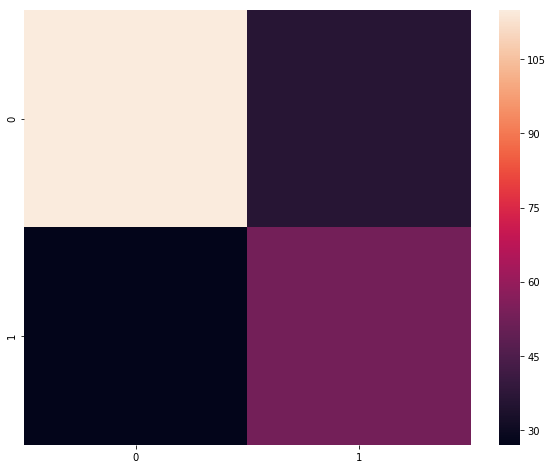

In [0]:
plt.figure(figsize=(10,8))
cm = confusion_matrix(Y_test,Y_pred_entropy)
label = ["0","1"]
sns.heatmap(cm,xticklabels = label,yticklabels= label)

In [0]:
db[['Pregnancies'],Pregnancies_names=pd.factorize(db(['Pregnancies'])
db['Glucose'],Glucose_names=pd.factorize(db['Glucose'])
db['BloodPressure'],BloodPressure_names=pd.factorize(db['BloodPressure'])
db['SkinThickness'],SkinThickness_names=pd.factorize(db['SkinThickness'])
db['Insulin'],Insulin_names=pd.factorize(db['Insulin'])
db['BMI'],BMI_names = pd.factorize(db['BMI'])                                       
                                           

SyntaxError: invalid syntax (<ipython-input-1-d161458f7ed3>, line 1)

In [0]:
X=db.iloc[:,0:8]
y=db.iloc[:,8]

In [0]:
#X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,shuffle=False)

In [0]:

array = []
k = 76
curr_pos = data.shape[0] - k

n_splits = data.shape[0]//k
for i in range(n_splits):
      
    
    if curr_pos != db.shape[0] - k:
        X_train =  pd.concat([X.iloc[0:curr_pos],X.iloc[curr_pos+k:]])
        y_train =  pd.concat([y.iloc[0:curr_pos],y.iloc[curr_pos+k:]])
        X_test = pd.concat([X.iloc[curr_pos:curr_pos+k]])
        y_test = pd.concat([y.iloc[curr_pos:curr_pos+k]])
        model = LogisticRegression()
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        array.append(accuracy_score(y_test,y_pred))
        
    else:
        X_train = X.iloc[0:curr_pos]
        y_train =  y.iloc[0:curr_pos]
        X_test = X.iloc[curr_pos:]
        y_test = y.iloc[curr_pos:]
        model = LogisticRegression()
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        array.append(accuracy_score(y_test,y_pred))
        
        
    curr_pos -= k
    
    
acc